# **Libraries**

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os

# **Access to Data**

In [26]:
# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Define paths to the dataset
dataset_path = '/content/drive/MyDrive/Tomato_Disease_Dataset'
train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'validation')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Image Parameters**

In [27]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16
NUM_CLASSES = len(os.listdir(train_dir))

# **Preprocessing for Training and Validation**

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# **Load Training and Validation data**

In [29]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 60 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


#**Building Convolutional Neural Network (CNN) Model**

In [30]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  bias_initializer="zeros",


# **Model Compilation**

In [31]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# **Model Training**

In [34]:

EPOCHS = 30
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.1517 - loss: 2.3052

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 726ms/step - accuracy: 0.1547 - loss: 2.2606 - val_accuracy: 0.1667 - val_loss: 1.7813
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 386ms/step - accuracy: 0.1709 - loss: 1.8703 - val_accuracy: 0.1667 - val_loss: 1.7875
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - accuracy: 0.1558 - loss: 1.7989 - val_accuracy: 0.1000 - val_loss: 1.7783
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.0774 - loss: 1.8004 - val_accuracy: 0.3000 - val_loss: 1.7632
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - accuracy: 0.1821 - loss: 1.7722 - val_accuracy: 0.2000 - val_loss: 1.7541
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.2080 - loss: 1.7747 - val_accuracy: 0.2333 - val_loss: 1.7261
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.2264 - loss: 1.7553 - val_accuracy: 0.4000 - val_loss: 1.6808
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.3655 - loss: 1.7358 - val_accuracy: 0.3667 - val_loss: 1.5981
Epo

# **Plot Model**

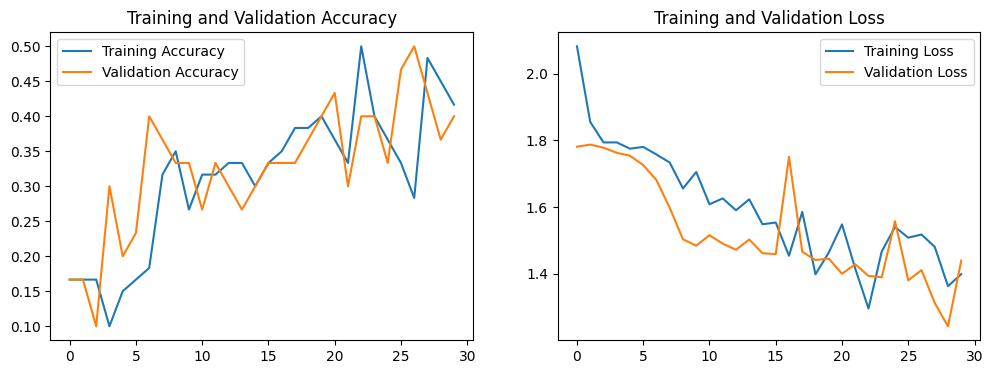

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# **Save and Evaluate Model**

In [41]:
# Save the model
model.save('/content/drive/MyDrive/tomato_disease_model.keras')

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4125 - loss: 1.4588
Validation Loss: 1.4399
Validation Accuracy: 0.4000
